TASK目标：本次任务的目的就一个：学习模仿。AlexNet也是DL领域比较早期的经典模型，值得认真学习模仿。

具体而言，本次TASK需要你：

（1）学习模仿这个经典网络，并对每行代码做注释解释；

（2）模仿这个经典模型的基本思想，创造一个属于你自己的CNN模型，并用于前面的性别识别案例，看看最好能做多好，是否有所改进？ 

（3）请对代码逐行注释，尤其要对model.summary中呈现的参数个数做详细解释。这对帮助大家更好地理解模型结构帮助巨大！

<center> <h1> 经典CNN网络：AlexNet 介绍 </h1> </center>

## Alexnet 概述
AlexNet是2012年ImageNet竞赛冠军获得者Hinton和他的学生Alex Krizhevsky设计的，其top5预测的错误率为18.9%，远超第二名。,是ImageNet竞赛中第一个使用神经网络的参赛者。在那年之后，更多的更深的神经网路被提出，比如优秀的vgg,GoogLeNet。

Alexnet处理的问题是1000分类问题，AlexNet采用8层的神经网络，5个卷积层和3个全连接层(3个卷积层后面加了最大池化层)，包含6亿3000万个链接，6000万个 参数和65万个神经元。

截止到北京时间2019/3/21,一共被引用37117次。

## Alexnet 创新点
1.成功使用ReLU作为CNN的激活函数，验证了其效果在较深的网络中超过了Sigmoid。

2.训练时使用Dropout随机忽略一部分神经元，以避免模型过拟合，一般在全连接层使用。

3.在CNN中使用重叠的最大池化(步长小于卷积核)。

4.提出LRN（Local Response Normalization，即局部响应归一化）层，逐渐被BN（Batch Nomalization）所代替。

5.使用CUDA加速神经网络的训练，利用了GPU强大的计算能力。受限于当时计算能力，Alexnet使用两块GPU进行训练。

6.数据增强，随机的从256×256的图片中截取224×224大小的区域（以及水平翻转的镜像）。

# 网络结构（详解）

> 输入层: 227×227×3的图片。

> 第1层：Conv2D(11×11，96), Stride(4), ReLU, Output: 55×55×96。

> 第2层：MaxPooling2D(3×3), Stride(2), Output: 27×27×96。

> 第3层：Conv2D(5×5，256），Same，Output：27×27×256。

> 第4层：Conv2D(3×3,256），Stride(2)，Output：13×13×256。

> 第5层：Conv2D(3×3,384），Same，Output：13×13×384。

> 第6层：Conv2D(3×3,384），Same，Output：13×13×384。

> 第7层：Conv2D（3×3，256），Same，Output：13×13×256。

> 第8层：MaxPooling2D（3×3），Stride（2），Output：6×6×256。

> 输出层：Flatten，Dense(4096)，Dropout(0.5)，Dense（4096），Dropout（0.5），Output。 

## Alexnet代码实现

In [1]:
import tensorflow as tf
import keras   
from keras.layers import Activation,Conv2D, BatchNormalization, Dense    # 导入各种层函数
from keras.layers import Dropout, Flatten, Input, MaxPooling2D, ZeroPadding2D  # 导入各种层函数
from keras import Model        # 模型
 
IMSIZE = 227           # 图片像素    
input_layer = Input([IMSIZE,IMSIZE,3])   # 定义一个通道为3的227*227的彩色图片
x = input_layer        # 赋值
x = Conv2D(96,[11,11],strides = [4,4], activation = 'relu')(x)   
# 对x做一个2维的96通道的11*11的卷积，步长是4*4

x = MaxPooling2D([3,3], strides = [2,2])(x)    # 最大池化，大小为3*3，步长为2*2
x = Conv2D(256,[5,5],padding = "same", activation = 'relu')(x)    #5*5规则的256个卷积核，步长为2*2
x = MaxPooling2D([3,3], strides = [2,2])(x)    # 最大池化，大小为3*3，步长为2*2
x = Conv2D(384,[3,3],padding = "same", activation = 'relu')(x)  # 3个连续的卷积，3*3的规格，1*1的步长，通道的个数为384
x = Conv2D(384,[3,3],padding = "same", activation = 'relu')(x) 
x = Conv2D(256,[3,3],padding = "same", activation = 'relu')(x)   # 3个连续的卷积，3*3的规格，1*1的步长，通道的个数为256
x = MaxPooling2D([3,3], strides = [2,2])(x)    # 最大池化，大小为3*3，步长为2*2
x = Flatten()(x)     # 拉直
x = Dense(4096,activation = 'relu')(x)  # 全连接到4096个节点
x = Dropout(0.5)(x)                      # 随机扔掉一半
x = Dense(4096,activation = 'relu')(x)  # 全连接到4096个节点
x = Dropout(0.5)(x)                     # 再次随机扔掉一半
x = Dense(2,activation = 'softmax')(x)   # 输出2个节点
output_layer=x               #  输出
model=Model(input_layer,output_layer)   # 基于以上，构建模型
model.summary()                   # 模型结构

Using TensorFlow backend.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 227, 227, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 384)       1327

以上模型参数清点：

输⼊层: 输⼊的是227*227像素的3通道的图⽚, 不消耗任何参数.

第⼀个卷积层: 输⼊是3通道, 输出是96通道, 每输出⼀个通道需要消耗: 输⼊通道数x卷积核⼤⼩+1个截距项=11x11x3+1=364. 共有364个输出通道, 所以消耗了364x96=34944个参数.

第⼀个最⼤池化层: 27*27像素输出96个通道的立体矩阵, 不需要任何参数.

第⼆个卷积层: 规格大小是27*27，96通道,  每输出⼀个通道需要消耗: 输⼊通道数x卷积核⼤⼩+1个截距项=5x5x96+1=2401. 共有256个输出通道, 所以消耗了2401x256=614656个参数.

第⼆个最⼤池化层: 13*13像素输出256个通道的立体矩阵, 不需要任何参数.

第三个卷积层: 3*3的卷积层，每输出⼀个通道需要消耗: 输⼊通道数x卷积核⼤⼩+1个截距项=3x3x256+1=401. 共有384个输出通道, 所以消耗了885120个参数.

第四个卷积层: 3*3的卷积层，每输出⼀个通道需要消耗: 输⼊通道数x卷积核⼤⼩+1个截距项=3x3x256+1=401. 共有384个输出通道, 所以消耗了1327488个参数.

第五个卷积层: 3*3的卷积层，每输出⼀个通道需要消耗: 输⼊通道数x卷积核⼤⼩+1个截距项=3x3x256+1=401. 共有384个输出通道, 所以消耗了884992个参数.

第三个最⼤池化层: 输出的还是6*6像素256的立体矩阵, 不需要任何参数.

**flatten层: 将上⼀层的256通道矩阵拉直成⼀个⻓向量, 输出的是6x6x256=9216的向量, 不需要消耗任何参数.

输出层1：建立一个4096的全连接网络，参数消耗的个数是9216+1，9217*4096=37752832个参数.

删除层1： 不需要任何参数.

输出层2：建立一个4096的全连接网络，参数消耗的个数是（4096+1）*2=16781312个参数.

删除层2： 不需要任何参数.

输出层2：建立一个4096的全连接网络，参数消耗的个数是8194个参数.

合计: 共消耗了: 34944+614656+885120+1327488+884992+37752832+16781312+8194=58289538个参数, 其中所有参数都需要训练. 所以需要训练的参数个数为:58289538，不需要训练的参数个数为：0

# 数据目录结构 

In [2]:
%ls ./data/ChineseStyle/
%ls ./data/ChineseStyle/train
%ls ./data/ChineseStyle/test

test/  train/
lishu/  xingkai/
lishu/  xingkai/


# 数据生成器

In [3]:
from keras.preprocessing.image import ImageDataGenerator    # 图像预处理

IMSIZE=227  # 像素

validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    './data/ChineseStyle/test/',      # 数据路径
    target_size=(IMSIZE, IMSIZE),    # 数据像素（目标大小）
    batch_size=200,                  # 批处理大小
    class_mode='categorical')       # 类模型

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    './data/ChineseStyle/train',     # 数据路径
    target_size=(IMSIZE, IMSIZE),    # 数据像素（目标大小）
    batch_size=200,                  # 批处理大小
    class_mode='categorical')       # 类模型

Found 5526 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


# 数据展示

<Figure size 432x288 with 0 Axes>

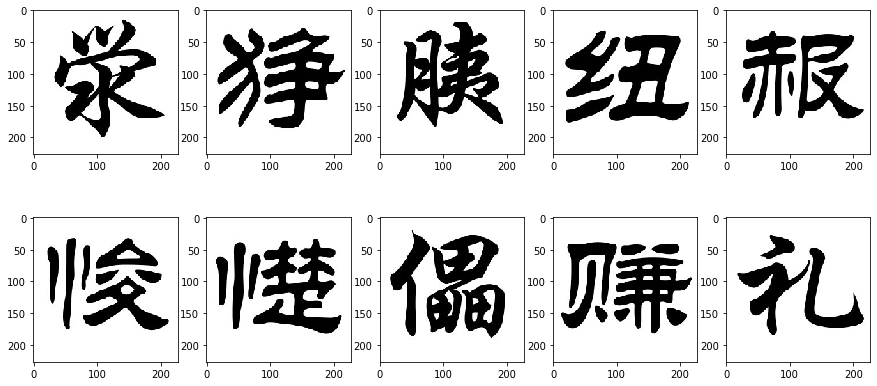

In [4]:
from matplotlib import pyplot as plt   # 导入绘图库

plt.figure()   # 初始画板
fig,ax = plt.subplots(2,5)   # 2行5列
fig.set_figheight(7)         # 高度
fig.set_figwidth(15)         # 宽度
ax=ax.flatten()       # 将ax拉直
X,Y=next(validation_generator)      
for i in range(10): ax[i].imshow(X[i,:,:,:])    # 循环展示

In [5]:
from keras.optimizers import Adam      # 导⼊优化器Adam
model.compile(loss='categorical_crossentropy',    #模型编译，损失函数为交叉熵
              optimizer=Adam(lr=0.001),metrics=['accuracy'])   #优化器为Adam，学习速率为0.001 #衡量指标为精度
model.fit_generator(train_generator,epochs=10,        # 训练10轮
                    validation_data=validation_generator) #模型训练，⽤训练集

Epoch 1/10
40/40 [==============================] - 33s 828ms/step - loss: 0.9548 - accuracy: 0.5633 - val_loss: 1.3905 - val_accuracy: 0.5094
Epoch 2/10
39/40 [============================>.] - ETA: 0s - loss: 0.6366 - accuracy: 0.6278

KeyboardInterrupt: 

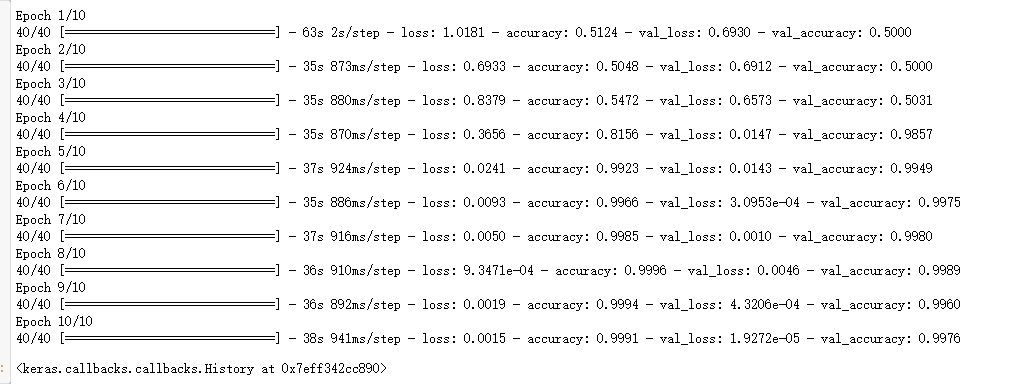

根据模型预测的精确率来看，0.99的准确率接近于1，所以该模型效果非常棒。

In [1]:
import pandas as pd   #导入库
MasterFile=pd.read_csv('F:/大三（上）/深度学习/TASK2.1：AI可以为颜值打分/FaceScore.csv')
#读入参考文件 
print(MasterFile.shape)  #打印数组维度
MasterFile.head()        #打印前五个

(24, 2)


,Filename,Rating
0,ftw (1).jpg,4.083333
1,mtw (2).jpg,3.666667
2,mtw (3).jpg,1.916667
3,mtw (4).jpg,2.416667
4,mtw (5).jpg,3.166667


In [68]:
import numpy as np
from PIL import Image  

FileNames=MasterFile['Filename']
N=len(FileNames)
IMSIZE= 100              
X=np.zeros([N,IMSIZE,IMSIZE,3])  
for i in range(N):     
    MyFile=FileNames[i]  
    Im=Image.open('F:/大三（上）/深度学习/TASK2.1：AI可以为颜值打分/image/'+MyFile)
    Im=Im.resize([IMSIZE,IMSIZE])  #图像的缩放
    Im=np.array(Im)/255     
    X[i,]=Im 

In [69]:
Y=np.zeros([N,2])
for i in range(N):
    gender=FileNames[i][0]
    if gender=='m':
        Y[i,0]=1
    else:
        Y[i,1]=1 

In [70]:
import tensorflow as tf
from tensorflow.keras import datasets, Sequential, layers,metrics
from sklearn.model_selection import train_test_split   #构造训练集和测试集
X0,X1,Y0,Y1=train_test_split(X,Y,test_size=0.3,random_state=1)

<Figure size 432x288 with 0 Axes>

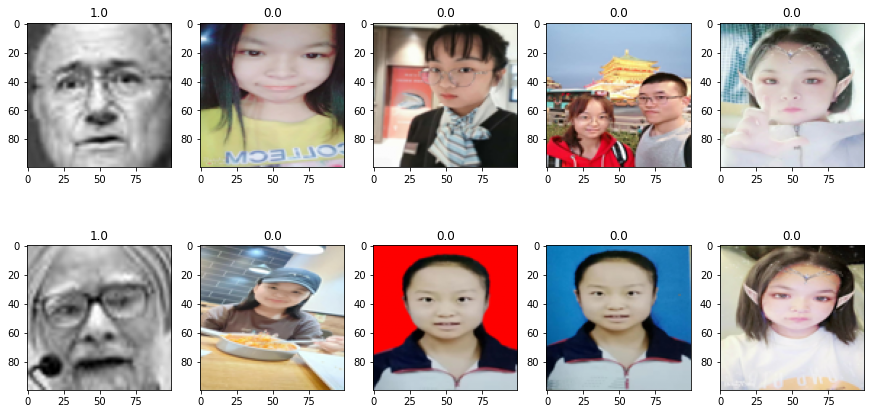

In [71]:
from matplotlib import pyplot as plt
plt.figure()                     #导入绘图库
fig,ax=plt.subplots(2,5)        #2行5列
fig.set_figheight(7.5)           
fig.set_figwidth(15)
ax=ax.flatten()
for i in range(10):             #展示10张照片的性别
    ax[i].imshow(X0[i,:,:,:])
    ax[i].set_title(Y0[i,0])

In [72]:
from keras.layers import Dense, Flatten, Input
from keras.layers import BatchNormalization, Conv2D,MaxPooling2D
from keras import Model

In [73]:
input_layer = Input([IMSIZE,IMSIZE,3])
x = input_layer
x = BatchNormalization()(x)
x = Conv2D(10,[2,2],activation='relu')(x)
x = MaxPooling2D([3,3])(x)
x = Flatten()(x)
x = Dense(2,activation='softmax')(x)
output_layer = x
model = Model(input_layer,output_layer)
model.summary()

Model: "functional_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 100, 100, 3)]     0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 100, 100, 3)       12        
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 99, 99, 10)        130       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 33, 33, 10)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 10890)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 21782     
Total params: 21,924
Trainable params: 21,918
Non-trainable params: 6
_________________________________________________

以上模型参数清点：

输⼊层: 输⼊的是100*100像素的3通道的图⽚, 不消耗任何参数.

batch层：输入100*100像素的3通道图片，消耗12个参数。

卷积层: 输⼊是2通道, 输出是3通道, 每输出⼀个通道需要消耗: 输⼊通道数x卷积核⼤⼩+1个截距项=2x2x3+1=13. 共有13个输出通道, 所以消耗了13x10=130个参数.

最⼤池化层: 99*99像素输出10个通道的立体矩阵, 不需要任何参数.

flatten层: 将通道矩阵拉直成⼀个⻓向量, 输出的是6x6x10=10890的向量, 不需要消耗任何参数.

输出层：建立一个2通道的全连接网络，参数消耗的个数是19890，10891*2=21782 个参数.

合计: 共消耗了:21,924个参数, 其中需要训练的参数个数为:21,918，不需要训练的参数个数为：6.

In [74]:
from keras.optimizers import Adam
model.compile(optimizer = Adam(0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [75]:
model.fit(X0,Y0,validation_data=(X1,Y1),batch_size=20,epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 178ms/step - loss: 0.4903 - accuracy: 0.8125 - val_loss: 1.8303 - val_accuracy: 0.7500
Epoch 2/10
1/1 [==============================] - 0s 28ms/step - loss: 0.5956 - accuracy: 0.8750 - val_loss: 2.2959 - val_accuracy: 0.7500
Epoch 3/10
1/1 [==============================] - 0s 25ms/step - loss: 0.6391 - accuracy: 0.8750 - val_loss: 2.3255 - val_accuracy: 0.7500
Epoch 4/10
1/1 [==============================] - 0s 26ms/step - loss: 0.5168 - accuracy: 0.8750 - val_loss: 2.1190 - val_accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 0s 23ms/step - loss: 0.3155 - accuracy: 0.8750 - val_loss: 1.7779 - val_accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 0s 31ms/step - loss: 0.1125 - accuracy: 0.8750 - val_loss: 1.3941 - val_accuracy: 0.7500
Epoch 7/10
1/1 [==============================] - 0s 40ms/step - loss: 0.0214 - accuracy: 1.0000 - val_loss: 1.0499 - val_accuracy: 0.7500
Epoch 8/10
1/1 [==========

模型的预测精度都达到1啦，可见该预测模型很棒！